# Basic Image Preprocessing, Data Augmentation, CNN and Transfer Learning

#### Get the current working directory

In [1]:
import os
PATH = os.getcwd()

#### Define the data path

In [2]:
DATA_PATH = os.path.join(PATH, 'data')
data_dir_list = os.listdir(DATA_PATH)

#### Get the list of folders inside data path

In [3]:
print(data_dir_list)

['Cats', 'Dogs', 'Horses', 'Humans']


#### Required variables declaration and initialization

In [4]:
img_rows=224
img_cols=224
num_channel=3

num_epoch=100
batch_size=32

img_data_list=[]
classes_names_list=[]

#### Read the images and store them in the list

In [5]:
import cv2

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(DATA_PATH+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)

Loading images from Cats folder

Loading images from Dogs folder

Loading images from Horses folder

Loading images from Humans folder



#### Get the number of classes

In [6]:
num_classes = len(classes_names_list)
print(num_classes)

4


####  Image preprocessiong

In [7]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [8]:
print (img_data.shape)

#img_data = img_data.reshape(img_data.shape[0], img_data.shape[1], img_data.shape[2], num_channel)

#print (img_data.shape)

(808, 224, 224, 3)


In [9]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [10]:
classes = np.ones((num_of_samples,), dtype='int64')

classes[0:202]=0
classes[202:404]=1
classes[404:606]=2
classes[606:]=3

Convert class labels to numberic using on-hot encoding

In [11]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Shuffle the dataset

In [12]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

#### Split the dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
y_test.shape

(162, 4)

####  Defining the model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

####  Compile the model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#### Model Summary

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 64)        0         
__________

In [19]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'name': 'conv2d_1',
   'trainable': True,
   'batch_input_shape': (None, 224, 224, 3),
   'dtype': 'float32',
   'filters': 32,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'valid',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Conv2D',
  'config': {'name': 'conv2d_2',
   'trainable': True,
   'filters': 32,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'valid',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': 

In [20]:
model.layers[0].get_config()

{'name': 'conv2d_1',
 'trainable': True,
 'batch_input_shape': (None, 224, 224, 3),
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [21]:
model.layers

In [22]:
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_4/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(179776, 64) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(64, 4) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32_ref>]

In [23]:
model.layers[0].get_weights()

[array([[[[-1.24698542e-01,  6.04135096e-02,  6.19565547e-02,
           -9.12919641e-03, -1.32090688e-01,  5.70187420e-02,
           -4.65183333e-02,  6.41807914e-02,  1.20189980e-01,
            6.17111772e-02,  1.34086460e-02,  1.10468715e-01,
           -6.62215501e-02,  5.66564947e-02, -9.54229981e-02,
            1.58452243e-02, -9.17211920e-02,  2.11912394e-02,
            1.35507718e-01,  1.10507742e-01,  3.91681343e-02,
            8.73439908e-02, -8.29268992e-03,  5.46224713e-02,
           -1.27434820e-01,  1.17509559e-01,  1.19733050e-01,
           -8.35070461e-02,  1.01938620e-01,  8.13000500e-02,
            2.90349126e-03, -4.98487651e-02],
          [-5.68491817e-02, -1.00977376e-01, -1.26592740e-01,
           -1.76356733e-03,  9.21525061e-03, -1.03681758e-01,
           -3.75581309e-02,  4.57062125e-02, -6.07430488e-02,
           -5.98984137e-02, -8.59619528e-02,  1.13856539e-01,
            8.08101892e-03,  9.18925703e-02,  1.29650816e-01,
            1.34659454e-

In [24]:
print(type(model.layers[0].get_weights()))

print(len(model.layers[0].get_weights()))

print(type(model.layers[0].get_weights()[0]))

print(model.layers[0].get_weights()[0].shape)

print(type(model.layers[0].get_weights()[1]))

print(model.layers[0].get_weights()[1].shape)

<class 'list'>
2
<class 'numpy.ndarray'>
(3, 3, 3, 32)
<class 'numpy.ndarray'>
(32,)


In [25]:
model.layers[0].input_shape

(None, 224, 224, 3)

In [26]:
model.layers[0].output_shape

(None, 222, 222, 32)

In [27]:
model.layers[0].trainable

True

#### Training/fit the model 

In [28]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 646 samples, validate on 162 samples
Epoch 1/100
646/646 [==============================] - 178s 276ms/step - loss: 1.8958 - acc: 0.2198 - val_loss: 1.3859 - val_acc: 0.2963
Epoch 2/100
646/646 [==============================] - 181s 280ms/step - loss: 1.3618 - acc: 0.3297 - val_loss: 1.3632 - val_acc: 0.2469
Epoch 3/100
646/646 [==============================] - 192s 298ms/step - loss: 1.3303 - acc: 0.4102 - val_loss: 1.3237 - val_acc: 0.4012
Epoch 4/100
646/646 [==============================] - 199s 308ms/step - loss: 1.2557 - acc: 0.4272 - val_loss: 1.3346 - val_acc: 0.3272
Epoch 5/100
646/646 [==============================] - 196s 303ms/step - loss: 1.2090 - acc: 0.4628 - val_loss: 1.2654 - val_acc: 0.4012
Epoch 6/100
646/646 [==============================] - 196s 303ms/step - loss: 1.0966 - acc: 0.5294 - val_loss: 1.1001 - val_acc: 0.4938
Epoch 7/100
646/646 [==============================] - 196s 303ms/step - loss: 0.9363 - acc: 0.6285 - val_loss: 1.0892 - val_acc: 0.

#### Evaluating the model

In [29]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

162/162 [==============================] - 15s 95ms/step
Test Loss: 5.461193485024535
Test Accuracy: 0.5370370370370371


In [30]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 224, 224, 3)


In [31]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[3.4530321e-09 1.4584199e-01 8.5415798e-01 5.0047588e-11]]
[2]
[[0. 0. 1. 0.]]


#### Predict and compute the confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred)

[[3.45297946e-09 1.45840392e-01 8.54159653e-01 5.00470221e-11]
 [2.54625775e-13 1.19122168e-09 1.00000000e+00 1.84109260e-15]
 [1.12098605e-05 8.11887145e-01 1.88101575e-01 1.58952984e-09]
 [9.99996305e-01 3.71067722e-06 1.88613300e-16 4.49655452e-11]
 [9.64185735e-14 1.00000000e+00 2.69955525e-09 1.12765854e-16]
 [6.46674037e-01 3.53301078e-01 3.36786941e-13 2.47848529e-05]
 [3.29853589e-09 9.97382700e-01 2.61670235e-03 6.17464877e-07]
 [1.00000000e+00 7.08278197e-18 0.00000000e+00 1.46406185e-29]
 [3.72696872e-27 1.00000000e+00 7.48470872e-32 4.80949214e-29]
 [1.64791859e-20 2.24272508e-26 2.91864727e-32 1.00000000e+00]
 [2.35567222e-05 9.99968529e-01 7.84349595e-06 1.29139088e-10]
 [2.00908400e-35 1.11686881e-26 2.94060941e-38 1.00000000e+00]
 [1.71240680e-12 1.66950958e-05 9.99982119e-01 1.24395774e-06]
 [1.00995614e-07 6.85562371e-12 2.13925734e-32 9.99999881e-01]
 [1.00000000e+00 9.95178480e-16 4.05309649e-18 3.74798877e-17]
 [1.90247300e-13 2.48584888e-06 9.99997497e-01 6.337288

In [33]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[2 2 1 0 1 0 1 0 1 3 1 3 2 3 0 2 1 0 3 1 1 3 1 1 0 1 1 3 0 1 1 1 2 2 0 3 3
 1 3 2 1 0 1 0 1 1 1 0 2 3 2 3 0 0 2 2 1 2 1 0 3 1 3 3 3 3 1 2 3 1 1 1 1 0
 1 1 1 1 3 1 3 2 3 2 2 1 1 1 0 1 2 2 1 1 3 3 2 2 2 3 0 3 1 2 3 3 0 2 3 2 2
 1 1 0 1 0 3 3 3 3 1 2 3 1 0 2 1 1 3 0 2 3 1 1 3 1 2 2 3 0 1 3 3 1 1 1 1 1
 0 1 1 2 3 3 1 3 3 2 1 2 0 3]


In [34]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[14 20  0  7]
 [ 4 21  7  8]
 [ 2  5 25  1]
 [ 5 15  1 27]]


#### Saving and loading model and weights

In [35]:
from keras.models import model_from_json, load_model

In [36]:
# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("model.h5")

In [37]:
# Load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("model.h5")

In [38]:
model.save('model.hdf5')
loaded_model = load_model('model.hdf5')

## Image Augmentation using ImageDataGenerator class

__ImageDataGenerator__

    Generates batches of tensor image data with real-time data augmentation.

#### Create the Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.5, 
    zoom_range=0.4, 
    rescale=1./255,
    vertical_flip=True, 
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) 

Path to save Augmented Images

In [40]:
TRN_AUGMENTED = os.path.join(PATH , 'Trn_Augmented_Images')
TST_AUGMENTED = os.path.join(PATH , 'Tst_Augmented_Images')

#### 1. Using .flow 

#### flow:
    Takes data & label arrays, generates batches of augmented data.

_keras.preprocessing.image.flow_(...)
    
Some frequently used parameters:

    x     : Input data. Numpy array of rank 4 or a tuple. 
    y     : Labels.
    subset: Subset of data ("training" or "validation") if  validation_split is set in ImageDataGenerator.
    

Use flow() to generate Train images in batches.

In [41]:
ftrain_generator = data_gen.flow(
        X_train,
        y_train,
        batch_size=batch_size, 
        shuffle=True,  
        subset="training")

Use flow() to generate Test images in batches.

In [42]:
ftest_generator = data_gen.flow(
        X_test,
        y_test,
        batch_size=batch_size, 
        shuffle=True,  
        subset="validation")

Fit the model using fit_generator() function and using the augmented images generated by flow() function 

#### fit_generator:
    Trains the model on data generated batch-by-batch by a Python generator (or an instance of Sequence).
    The generator is run in parallel to the model, for efficiency. For instance, this allows you to do real-time 
    data augmentation on images on CPU in parallel to training your model on GPU.

In [43]:
model.fit_generator(ftrain_generator, epochs = num_epoch, validation_data=ftest_generator)

Epoch 1/100
17/17 [==============================] - 154s 9s/step - loss: 1.4068 - acc: 0.2490 - val_loss: 1.4407 - val_acc: 0.2500
Epoch 2/100
17/17 [==============================] - 151s 9s/step - loss: 1.3964 - acc: 0.2678 - val_loss: 1.4363 - val_acc: 0.2500
Epoch 3/100
17/17 [==============================] - 152s 9s/step - loss: 1.3971 - acc: 0.2584 - val_loss: 1.4337 - val_acc: 0.2500
Epoch 4/100
17/17 [==============================] - 153s 9s/step - loss: 1.3994 - acc: 0.2584 - val_loss: 1.4302 - val_acc: 0.2500
Epoch 5/100
17/17 [==============================] - 151s 9s/step - loss: 1.3957 - acc: 0.2397 - val_loss: 1.4284 - val_acc: 0.2500
Epoch 6/100
17/17 [==============================] - 151s 9s/step - loss: 1.3981 - acc: 0.2397 - val_loss: 1.4253 - val_acc: 0.2500
Epoch 7/100
17/17 [==============================] - 151s 9s/step - loss: 1.3952 - acc: 0.2397 - val_loss: 1.4219 - val_acc: 0.2500
Epoch 8/100
17/17 [==============================] - 151s 9s/step - loss: 1.

Evaluate the model

In [44]:
model.evaluate_generator(ftest_generator, verbose=1)

1/1 [==============================] - 3s 3s/step


[1.3771507740020752, 0.21875]

Predict on the augmented test set

In [45]:
train_fdata_predict = model.predict_generator(ftest_generator, verbose=1)

1/1 [==============================] - 4s 4s/step


Find the value of Classes of augmented test set

In [46]:
train_fdata_predict.argmax(axis=-1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### Predict and compute the confusion matrix

In [47]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[1.94642205e-10 1.91308689e-04 9.99808729e-01 5.69845116e-10]
 [1.88642539e-11 1.31358946e-09 1.00000000e+00 5.82881996e-13]
 [1.50599444e-04 9.46014881e-01 5.38311787e-02 3.43139664e-06]
 [9.99086142e-01 4.31748020e-04 2.84486185e-11 4.82061907e-04]
 [9.76865047e-11 9.99993801e-01 6.22830794e-06 3.21214171e-12]
 [9.97663856e-01 2.29083630e-03 5.66297139e-12 4.53399407e-05]
 [9.21665503e-07 1.99979115e-02 9.79999900e-01 1.26601810e-06]
 [1.00000000e+00 5.95165757e-20 1.07144133e-36 4.28746596e-23]
 [1.63999878e-19 1.00000000e+00 1.26853458e-21 4.17578747e-21]
 [1.76250599e-18 1.62042693e-21 3.06383000e-25 1.00000000e+00]
 [3.45969014e-03 3.11004907e-01 6.85527861e-01 7.52047026e-06]
 [1.46594937e-31 8.78458556e-26 4.51616513e-31 1.00000000e+00]
 [8.53400263e-14 1.99940601e-07 9.99999762e-01 1.20422969e-08]
 [5.94348080e-07 1.13118825e-09 2.19447023e-24 9.99999404e-01]
 [9.99999404e-01 1.21922156e-12 7.00423886e-11 5.88071657e-07]
 [1.77855086e-13 1.73333305e-07 9.99999881e-01 3.442499

In [48]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[2 2 1 0 1 0 2 0 1 3 2 3 2 3 0 2 1 0 3 1 1 3 1 1 0 1 1 3 0 1 2 1 2 2 0 3 3
 1 3 2 1 0 1 0 3 1 1 0 2 3 2 3 0 0 2 2 1 2 1 0 3 1 3 3 3 3 1 2 3 2 1 1 1 0
 1 1 1 1 3 1 3 2 3 2 2 1 1 0 0 1 2 2 1 1 3 3 2 2 2 3 0 3 1 2 1 3 0 2 3 2 2
 1 1 0 1 0 3 3 3 3 1 2 3 1 0 2 1 1 3 0 2 3 1 0 3 1 2 2 3 0 1 3 3 1 1 0 2 1
 3 0 1 2 3 3 1 3 3 2 1 2 0 3]


In [49]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[15 17  2  7]
 [ 6 19  7  8]
 [ 2  3 27  1]
 [ 5 13  2 28]]


#### 2. Using flow_from_directory()

#### flow_from_directory:
    Takes the path to a directory & generates batches of augmented data.

keras.preprocessing.image.flow_from_directory(...)
    
        directory: Path to the target directory. 
        target_size: The dimensions to which all images found will be resized e.g.(256, 256).
        color_mode: One of "grayscale", "rbg". Default: "rgb". 
        class_mode:Determines the type of label arrays that are returned:m
        batch_size: Size of the batches of data (default: 32).
        shuffle: Whether to shuffle the data (default: True)
        save_to_dir:This allows you to optionally specify a directory to which to save the augmented pictures 
        being generated.
        save_prefix: Str. Prefix to use for filenames of saved pictures.
        save_format: One of "png", "jpeg".
        subset: Subset of data ("training" or "validation") if  validation_split is set in ImageDataGenerator.

Read training Images in batches for Image Augmentation

In [50]:
train_generator = data_gen.flow_from_directory(
        DATA_PATH,
        target_size=(img_rows, img_cols), 
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb', 
        shuffle=True,  
        save_to_dir=TRN_AUGMENTED, 
        save_prefix='TrainAugmented', 
        save_format='png', 
        subset="training")

Found 648 images belonging to 4 classes.


Classes will be automatically assigned based on the folder structure

In [51]:
train_generator.class_indices

{'Cats': 0, 'Dogs': 1, 'Horses': 2, 'Humans': 3}

Read testing Images in batches for Image Augmentation 



_Note_: 

    In real situations test data images if augmentation is not required, since we need the original image for prediction 
    Use ImageDatagenerator class only for standardization as commented below:
    testdatagen = ImageDataGenerator(rescale=1./255) only for test data  

In [52]:
test_generator = data_gen.flow_from_directory(
        DATA_PATH,
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb', 
        shuffle=True, 
        seed=None, 
        save_to_dir=TST_AUGMENTED, 
        save_prefix='TestAugmented', 
        save_format='png',
        subset="validation")

Found 160 images belonging to 4 classes.


In [53]:
test_generator.class_indices

{'Cats': 0, 'Dogs': 1, 'Horses': 2, 'Humans': 3}

Fit the model

In [54]:
model.fit_generator(train_generator, epochs=num_epoch, validation_data=test_generator)

Epoch 1/100
21/21 [==============================] - 204s 10s/step - loss: 2.2244 - acc: 0.3041 - val_loss: 1.3884 - val_acc: 0.2812
Epoch 2/100
21/21 [==============================] - 197s 9s/step - loss: 1.3766 - acc: 0.2860 - val_loss: 1.3766 - val_acc: 0.2625
Epoch 3/100
21/21 [==============================] - 200s 10s/step - loss: 1.3864 - acc: 0.2515 - val_loss: 1.3962 - val_acc: 0.2375
Epoch 4/100
21/21 [==============================] - 201s 10s/step - loss: 1.3794 - acc: 0.2809 - val_loss: 1.3855 - val_acc: 0.2875
Epoch 5/100
21/21 [==============================] - 200s 10s/step - loss: 1.3969 - acc: 0.3173 - val_loss: 1.3682 - val_acc: 0.2812
Epoch 6/100
21/21 [==============================] - 198s 9s/step - loss: 1.3434 - acc: 0.3303 - val_loss: 1.2783 - val_acc: 0.4313
Epoch 7/100
21/21 [==============================] - 199s 9s/step - loss: 1.3392 - acc: 0.3454 - val_loss: 1.2962 - val_acc: 0.4000
Epoch 8/100
21/21 [==============================] - 199s 9s/step - loss

#### Evaluate the model 

Use evaluate_generator

In [55]:
fd_model_evaluate = model.evaluate_generator(test_generator, verbose=1)

5/5 [==============================] - 23s 5s/step


In [56]:
print("Loss: ", fd_model_evaluate[0], "Accuracy: ", fd_model_evaluate[1])

Loss:  1.0803300380706786 Accuracy:  0.525


##### Predict 

Using predict_generator:
    
    Generates predictions for the input samples from a data generator.

In [57]:
fd_model_predict = model.predict_generator(test_generator, verbose=1)

5/5 [==============================] - 21s 4s/step


In [58]:
#Predict the classes of Validation data

fd_model_predict.argmax(axis=-1)

array([1, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 3, 1, 0, 2, 0, 3, 0, 0, 1, 3, 0,
       2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 3, 0, 3, 1, 3, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 3, 1, 1, 0, 0, 3, 3, 1,
       1, 0, 0, 1, 0, 3, 2, 2, 0, 3, 3, 0, 0, 3, 1, 0, 1, 0, 2, 0, 3, 0,
       3, 0, 1, 1, 0, 1, 0, 3, 0, 3, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 2, 1, 2, 0, 1, 0, 0, 0,
       3, 0, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 0, 0, 3, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1], dtype=int64)

# Transfer Learning 

##### VGG Architecture

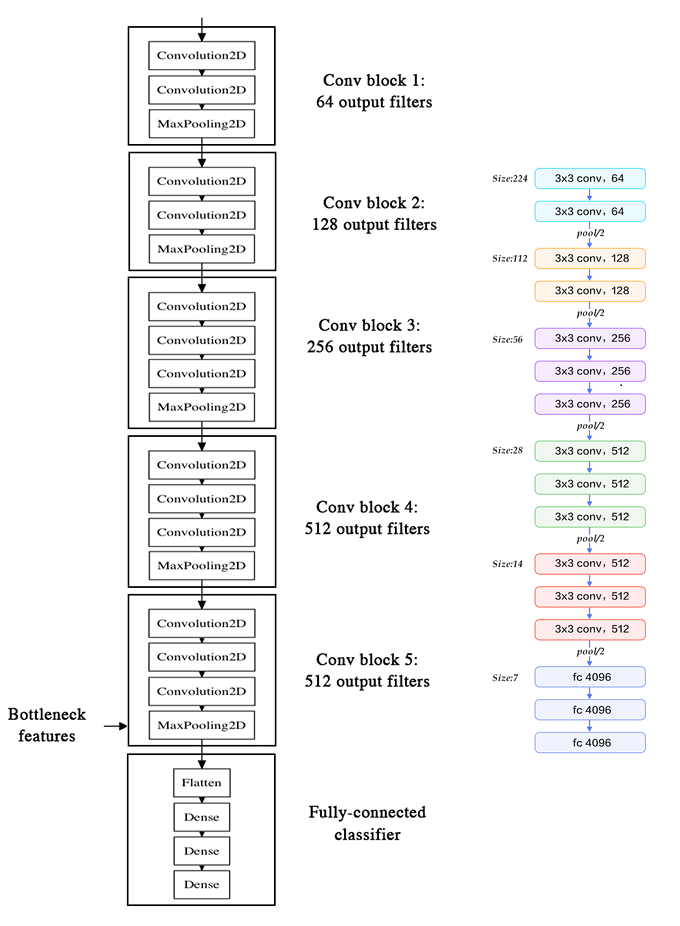

In [59]:
from IPython.display import Image
Image(filename='vgg16.png')

In [60]:
from keras.layers import Input, Dense

In [61]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(img_rows, img_cols, num_channel))

In [62]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [64]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)

In [65]:
from keras.models import Model

custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [66]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

###### custom_vgg_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [68]:
custom_vgg_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 646 samples, validate on 162 samples
Epoch 1/100
646/646 [==============================] - 567s 877ms/step - loss: 1.8201 - acc: 0.4350 - val_loss: 1.3455 - val_acc: 0.4259
Epoch 2/100
646/646 [==============================] - 548s 849ms/step - loss: 1.0222 - acc: 0.5913 - val_loss: 2.4292 - val_acc: 0.4074
Epoch 3/100
646/646 [==============================] - 515s 798ms/step - loss: 0.8533 - acc: 0.6920 - val_loss: 0.7690 - val_acc: 0.7099
Epoch 4/100
646/646 [==============================] - 524s 811ms/step - loss: 0.7093 - acc: 0.7214 - val_loss: 0.6552 - val_acc: 0.7346
Epoch 5/100
646/646 [==============================] - 537s 831ms/step - loss: 0.6877 - acc: 0.7291 - val_loss: 0.5189 - val_acc: 0.7716
Epoch 6/100
646/646 [==============================] - 513s 795ms/step - loss: 0.6142 - acc: 0.7570 - val_loss: 1.2857 - val_acc: 0.5247
Epoch 7/100
646/646 [==============================] - 514s 796ms/step - loss: 0.5897 - acc: 0.7678 - val_loss: 0.4307 - val_acc: 0.

In [69]:
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

162/162 [==============================] - 103s 633ms/step
[INFO] loss=0.2429, accuracy: 94.4444%


In [70]:
Y_train_pred = custom_vgg_model.predict(X_test)

In [71]:
y_train_pred = np.argmax(Y_train_pred, axis=1)
print(y_train_pred)

[2 2 0 0 3 2 3 3 1 3 1 3 2 3 3 2 0 3 3 2 1 3 0 0 0 1 3 3 0 3 2 1 2 2 0 3 1
 1 3 2 1 0 1 0 1 1 1 0 2 0 2 0 1 1 2 2 0 2 3 0 3 0 0 3 1 1 1 2 3 2 0 0 3 0
 3 0 1 3 0 2 1 1 1 2 2 1 1 3 0 0 2 1 0 0 3 0 2 2 2 3 0 3 0 1 1 3 0 3 3 2 2
 3 1 0 2 1 3 2 3 3 1 0 3 0 2 2 1 2 1 0 2 3 0 1 3 0 1 2 1 3 1 0 3 3 3 0 0 3
 3 1 0 1 0 3 3 3 3 1 1 2 1 0]


In [72]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_train_pred))

[[38  3  0  0]
 [ 2 37  1  0]
 [ 1  0 32  0]
 [ 1  0  1 46]]


###### Transfer Learning - 2

In [73]:
# Training the feature extraction also
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [74]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [75]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [76]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

In [77]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [78]:
custom_vgg_model2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [79]:
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 646 samples, validate on 162 samples
Epoch 1/100
646/646 [==============================] - 1545s 2s/step - loss: 1.8321 - acc: 0.4056 - val_loss: 1.1205 - val_acc: 0.4198
Epoch 2/100
646/646 [==============================] - 526s 814ms/step - loss: 0.5560 - acc: 0.8096 - val_loss: 1.4286 - val_acc: 0.4691
Epoch 3/100
646/646 [==============================] - 501s 775ms/step - loss: 0.3159 - acc: 0.8916 - val_loss: 0.3535 - val_acc: 0.8889
Epoch 4/100
646/646 [==============================] - 499s 773ms/step - loss: 0.1382 - acc: 0.9582 - val_loss: 0.5090 - val_acc: 0.7963
Epoch 5/100
646/646 [==============================] - 502s 777ms/step - loss: 0.1945 - acc: 0.9412 - val_loss: 0.2250 - val_acc: 0.9198
Epoch 6/100
646/646 [==============================] - 499s 772ms/step - loss: 0.0459 - acc: 0.9969 - val_loss: 0.2618 - val_acc: 0.8889
Epoch 7/100
646/646 [==============================] - 501s 776ms/step - loss: 0.0244 - acc: 0.9985 - val_loss: 0.4899 - val_acc: 0.84

Epoch 59/100
646/646 [==============================] - 501s 776ms/step - loss: 1.1467e-05 - acc: 1.0000 - val_loss: 0.2654 - val_acc: 0.9259
Epoch 60/100
646/646 [==============================] - 538s 833ms/step - loss: 1.1313e-05 - acc: 1.0000 - val_loss: 0.2667 - val_acc: 0.9259
Epoch 61/100
646/646 [==============================] - 612s 947ms/step - loss: 1.0885e-05 - acc: 1.0000 - val_loss: 0.2665 - val_acc: 0.9198
Epoch 62/100
646/646 [==============================] - 560s 867ms/step - loss: 1.0661e-05 - acc: 1.0000 - val_loss: 0.2669 - val_acc: 0.9198
Epoch 63/100
646/646 [==============================] - 587s 908ms/step - loss: 1.0381e-05 - acc: 1.0000 - val_loss: 0.2676 - val_acc: 0.9259
Epoch 64/100
646/646 [==============================] - 571s 885ms/step - loss: 1.0128e-05 - acc: 1.0000 - val_loss: 0.2694 - val_acc: 0.9198
Epoch 65/100
646/646 [==============================] - 595s 922ms/step - loss: 9.8605e-06 - acc: 1.0000 - val_loss: 0.2681 - val_acc: 0.9259
Epoch 

In [80]:
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

162/162 [==============================] - 121s 744ms/step
[INFO] loss=0.2808, accuracy: 91.9753%


In [81]:
Y_train_pred = custom_vgg_model2.predict(X_test)

In [82]:
y_train_pred = np.argmax(Y_train_pred, axis=1)
print(y_train_pred)

[2 2 1 0 1 2 3 3 1 3 1 3 2 3 3 2 0 3 3 2 1 3 0 0 0 1 3 3 0 3 2 1 2 2 0 3 1
 1 3 2 1 0 1 0 1 1 1 0 2 0 2 3 1 1 2 2 0 2 3 0 3 0 0 3 1 1 1 2 3 2 0 0 2 0
 3 0 1 3 1 2 1 1 1 2 2 1 1 3 1 0 2 1 0 0 3 0 2 2 2 3 0 3 0 1 3 3 0 3 3 2 2
 3 1 0 2 1 3 2 3 3 1 0 3 0 2 2 1 2 1 0 2 3 0 1 3 0 1 2 0 3 1 0 3 3 3 0 0 3
 3 0 1 1 0 3 3 3 3 1 1 2 1 0]


In [83]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_train_pred))

[[36  5  0  0]
 [ 2 36  1  1]
 [ 1  0 32  0]
 [ 0  1  2 45]]
